In [2]:
# Generales.
import numpy as np
from IPython.display import display

# Cuánticos.
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.circuit import Parameter

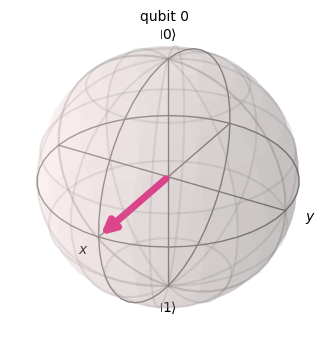

In [2]:
state = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
plot_bloch_multivector(state, figsize=(4,4))

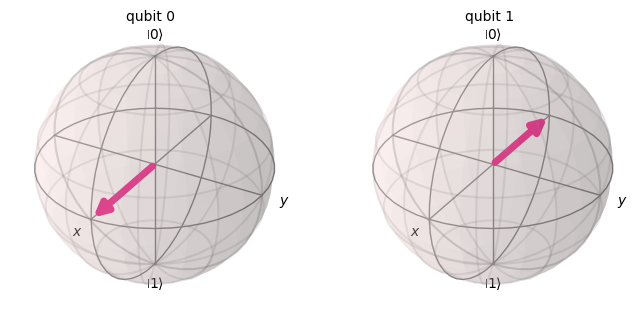

In [3]:
qc = QuantumCircuit(1)
qc.h(0)
original = Statevector.from_instruction(qc)
qc.z(0)
final = Statevector.from_instruction(qc)
plot_bloch_multivector(final.tensor(original), figsize=(4,4))

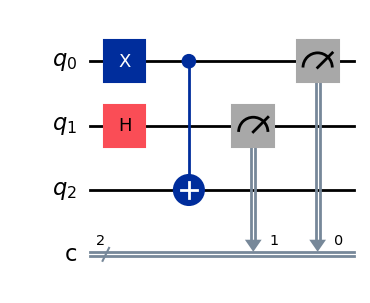

In [4]:
qc = QuantumCircuit(3, 2)

qc.h(1)
qc.x(0)
qc.cx(0,2)
qc.measure([0,1],[0,1])

qc.draw(output='mpl')

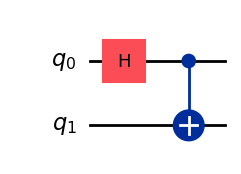

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw(output='mpl')

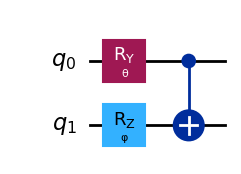

In [6]:
qc = QuantumCircuit(2)

theta = Parameter('θ')
phi = Parameter('φ')
qc.ry(theta, 0)
qc.rz(phi, 1)
qc.cx(0, 1) 

qc.draw(output='mpl')

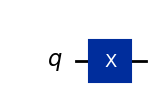

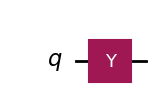

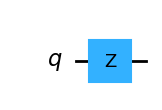

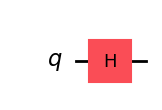

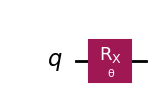

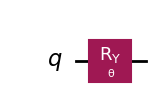

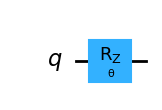

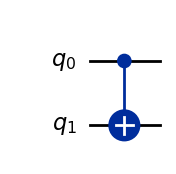

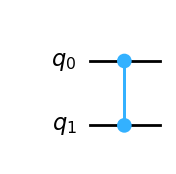

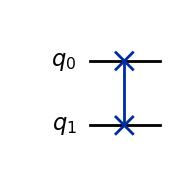

In [7]:
theta = Parameter('θ')

gates_1 = [
    lambda qc: qc.x(0),
    lambda qc: qc.y(0),
    lambda qc: qc.z(0),
    lambda qc: qc.h(0),
    lambda qc: qc.rx(theta, 0),
    lambda qc: qc.ry(theta, 0),
    lambda qc: qc.rz(theta, 0)
]

gates_2 = [
    lambda qc: qc.cx(0,1),
    lambda qc: qc.cz(0,1),
    lambda qc: qc.swap(0,1)
]

for gate in gates_1:
    qc = QuantumCircuit(1)
    gate(qc)
    display(qc.draw(output='mpl'))

for gate in gates_2:
    qc = QuantumCircuit(2)
    gate(qc)
    display(qc.draw(output='mpl'))

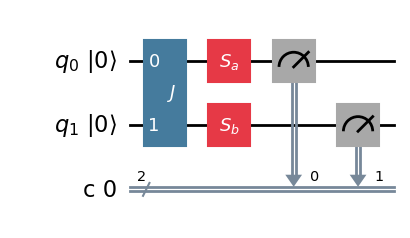

In [9]:
qc = QuantumCircuit(2, 2)

Ug = np.identity(4)
Ua = np.identity(2)
Ub = np.identity(2)

qc.unitary(Ug, qubits = [0,1], label = "$J$")
qc.unitary(Ua, qubits = [0], label = "$S_a$")
qc.unitary(Ub, qubits = [1], label = "$S_b$")
qc.measure([0,1],[0,1])

gate_colours = {
    "displaycolor": {
        "$S_a$": ("#e63946", "#FFFFFF"),
        "$S_b$": ("#e63946", "#FFFFFF"),
        "$J$": ("#457b9d", "#FFFFFF"),
    }
}

qc.draw(output='mpl', style=gate_colours, initial_state=True)

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Braian\AppData\Local\Temp\ipykernel_13208\2589205553.py:10: SyntaxWarning: invalid escape sequence '\d'
  qc.unitary(J, qubits = [0,1], label = "$J^\dagger$")
C:\Users\Braian\AppData\Local\Temp\ipykernel_13208\2589205553.py:18: SyntaxWarning: invalid escape sequence '\d'
  "$J^\dagger$": ("#457b9d", "#FFFFFF"),


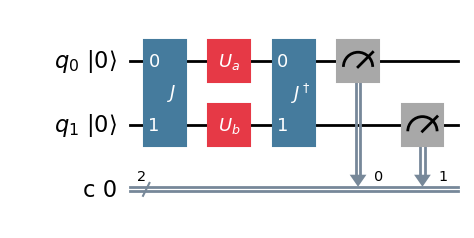

In [4]:
qc = QuantumCircuit(2, 2)

J = np.identity(4)
Ua = np.identity(2)
Ub = np.identity(2)

qc.unitary(J, qubits = [0,1], label = "$J$")
qc.unitary(Ua, qubits = [0], label = "$U_a$")
qc.unitary(Ub, qubits = [1], label = "$U_b$")
qc.unitary(J, qubits = [0,1], label = "$J^\dagger$")
qc.measure([0,1],[0,1])

gate_colours = {
    "displaycolor": {
        "$U_a$": ("#e63946", "#FFFFFF"),
        "$U_b$": ("#e63946", "#FFFFFF"),
        "$J$": ("#457b9d", "#FFFFFF"),
        "$J^\dagger$": ("#457b9d", "#FFFFFF"),
    }
}

qc.draw(output='mpl', style=gate_colours, initial_state=True)

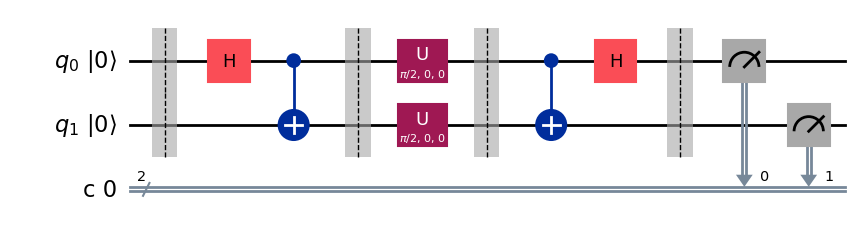

In [13]:
qc = QuantumCircuit(2, 2)

Q = np.identity(4)

qc.barrier()
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.u(np.pi/2, 0, 0, 0)
qc.u(np.pi/2, 0, 0, 1)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure([0,1],[0,1])

qc.draw(output='mpl', initial_state=True)

In [15]:
qc = QuantumCircuit(2, 2)

Q = np.identity(4)


qc.u(np.pi/2, 0, 0, 0)
qc.u(np.pi/2, 0, 0, 1)


Statevector.from_instruction(qc).draw("latex")

<IPython.core.display.Latex object>